In [46]:
import pandas as pd

df = pd.read_csv('crossref_nlp_metadata.csv')

df.head()

,title,doi,authors,publication_date,journal,publisher,abstract,keywords,references_count,cited_by_count,funders,license,url,affiliations
0,"Robotics, Grounding and Natural Language Proce...",10.5715/jnlp.27.963,Daichi Mochihashi,2021-03-14T22:09:27Z,Journal of Natural Language Processing,Association for Natural Language Processing,NaN,NaN,7,1,NaN,NaN,http://dx.doi.org/10.5715/jnlp.27.963,The Institute of Statistical Mathematics
1,"Vision, status, and research topics of Natural...",10.1016/j.nlp.2022.100001,"Xieling Chen, Haoran Xie, Xiaohui Tao",2022-12-16T14:42:01Z,Natural Language Processing Journal,Elsevier BV,NaN,NaN,49,6,NaN,https://www.elsevier.com/tdm/userlicense/1.0/,http://dx.doi.org/10.1016/j.nlp.2022.100001,NaN
2,NLPutils: Natural Language Processing Utilities,10.32614/cran.package.nlputils,Kurt Hornik,2024-06-08T12:17:37Z,CRAN: Contributed Packages,The R Foundation,NaN,NaN,0,0,NaN,NaN,http://dx.doi.org/10.32614/cran.package.nlputils,NaN
3,Automatic language ability assessment method b...,10.1016/j.nlp.2024.100094,"Nonso Nnamoko, Themis Karaminis, Jack Procter,...",2024-08-06T16:59:59Z,Natural Language Processing Journal,Elsevier BV,NaN,NaN,84,0,NaN,https://www.elsevier.com/tdm/userlicense/1.0/,http://dx.doi.org/10.1016/j.nlp.2024.100094,NaN
4,What Is Natural Language Processing?,10.1007/978-1-4842-3733-5_1,Taweh Beysolow II,2018-09-11T16:44:04Z,Applied Natural Language Processing with Python,Apress,NaN,NaN,0,7,NaN,http://www.springer.com/tdm,http://dx.doi.org/10.1007/978-1-4842-3733-5_1,NaN


# Data Preprocessing

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             9982 non-null   object 
 1   doi               10000 non-null  object 
 2   authors           9257 non-null   object 
 3   publication_date  10000 non-null  object 
 4   journal           9464 non-null   object 
 5   publisher         10000 non-null  object 
 6   abstract          999 non-null    object 
 7   keywords          0 non-null      float64
 8   references_count  10000 non-null  int64  
 9   cited_by_count    10000 non-null  int64  
 10  funders           176 non-null    object 
 11  license           2394 non-null   object 
 12  url               10000 non-null  object 
 13  affiliations      1570 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB
None


- drop keywords column (0 objects)
- make sure years are 2014-2024
- drop rows without title

In [48]:
df = df.drop(['keywords'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             9982 non-null   object
 1   doi               10000 non-null  object
 2   authors           9257 non-null   object
 3   publication_date  10000 non-null  object
 4   journal           9464 non-null   object
 5   publisher         10000 non-null  object
 6   abstract          999 non-null    object
 7   references_count  10000 non-null  int64 
 8   cited_by_count    10000 non-null  int64 
 9   funders           176 non-null    object
 10  license           2394 non-null   object
 11  url               10000 non-null  object
 12  affiliations      1570 non-null   object
dtypes: int64(2), object(11)
memory usage: 1015.8+ KB


In [49]:
df['year'] = pd.to_datetime(df['publication_date']).dt.year
df = df[df['year'].between(2014, 2024)]
df = df.drop(['publication_date'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             9979 non-null   object
 1   doi               9997 non-null   object
 2   authors           9254 non-null   object
 3   journal           9461 non-null   object
 4   publisher         9997 non-null   object
 5   abstract          999 non-null    object
 6   references_count  9997 non-null   int64 
 7   cited_by_count    9997 non-null   int64 
 8   funders           176 non-null    object
 9   license           2393 non-null   object
 10  url               9997 non-null   object
 11  affiliations      1570 non-null   object
 12  year              9997 non-null   int32 
dtypes: int32(1), int64(2), object(10)
memory usage: 1.0+ MB


In [50]:
df = df.dropna(subset=['title'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9979 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             9979 non-null   object
 1   doi               9979 non-null   object
 2   authors           9254 non-null   object
 3   journal           9443 non-null   object
 4   publisher         9979 non-null   object
 5   abstract          999 non-null    object
 6   references_count  9979 non-null   int64 
 7   cited_by_count    9979 non-null   int64 
 8   funders           176 non-null    object
 9   license           2393 non-null   object
 10  url               9979 non-null   object
 11  affiliations      1570 non-null   object
 12  year              9979 non-null   int32 
dtypes: int32(1), int64(2), object(10)
memory usage: 1.0+ MB


In [62]:
# Example keywords for each category
deep_learning_keywords = [
    "deep learning",
    "deep",
    "neural network",
    "ann",
    "artifical neural network",
    "convolutional neural network",
    "CNN",
    "recurrent neural network",
    "RNN",
    "long short-term memory",
    "LSTM",
    "transformer",
    "attention mechanism",
    "autoencoder",
    "GAN",
    "generative adversarial network",
    "unsupervised learning",
    "supervised learning",
    "reinforcement learning",
    "deep neural network",
    "DNN",
    "backpropagation",
    "transfer learning",
    "fine-tuning",
    "deep Q-network",
    "DQN",
    "natural language processing",
    "NLP",
    "machine vision",
    "image recognition",
    "speech recognition",
    "deep belief network",
    "DBN",
    "multilayer perceptron",
    "MLP",
    "embedding",
    "representation learning",
    "dropout",
    "batch normalization",
    "hyperparameter tuning",
    "gradient descent",
    "stochastic gradient descent",
    "SGD",
    "Adam optimizer",
    "overfitting",
    "underfitting"
]

# Function to classify titles
def classify_title(title):
    title_lower = title.lower()  # Convert to lower case for easier matching
    if any(keyword in title_lower for keyword in deep_learning_keywords):
        return "Deep Learning"
    else:
        return "Other"

# Apply the categorization to titles
df['category'] = df['title'].apply(classify_title)

df['category'].value_counts()

category
Other            6191
Deep Learning    3788
Name: count, dtype: int64

In [63]:
# Group by year and methodology
trend_data = df.groupby(['year', 'category']).size().unstack().fillna(0)

# Normalize by year to get percentages
trend_data_percentage = trend_data.div(trend_data.sum(axis=1), axis=0)

# Inspect the trend data
print(trend_data_percentage)


category  Deep Learning     Other
year                             
2014           0.326389  0.673611
2015           0.256735  0.743265
2016           0.298701  0.701299
2017           0.429787  0.570213
2018           0.364566  0.635434
2019           0.260282  0.739718
2020           0.387168  0.612832
2021           0.366819  0.633181
2022           0.556512  0.443488
2023           0.347937  0.652063
2024           0.641379  0.358621


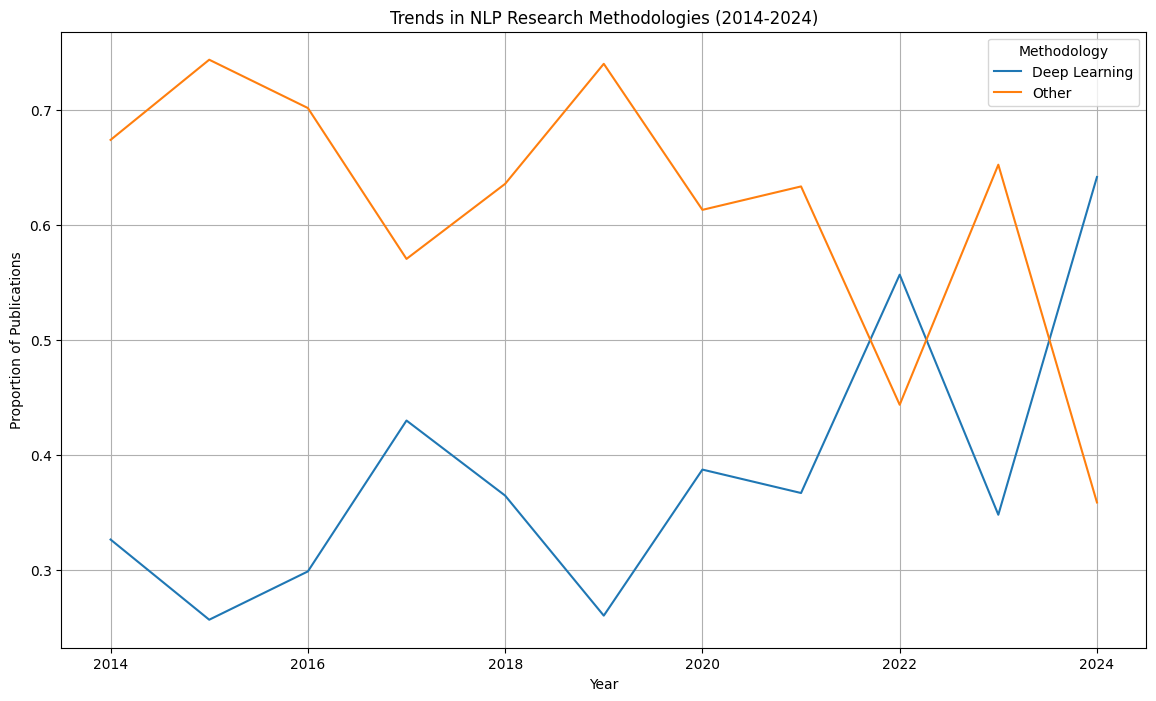

In [64]:
import matplotlib.pyplot as plt

# Plotting the trend data
plt.figure(figsize=(14, 8))
for column in trend_data_percentage.columns:
    plt.plot(trend_data_percentage.index, trend_data_percentage[column], label=column)

plt.title('Trends in NLP Research Methodologies (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications')
plt.legend(title='Methodology')
plt.grid(True)
plt.show()

In [78]:
import statsmodels.api as sm
import numpy as np

# Assuming you have the proportions in a DataFrame `trend_data` and a `Year` column
trend_data['logit'] = np.log(trend_data['Deep Learning'] / trend_data['Other'])  # Logit transformation of proportions

# Standardizing the Year variable
trend_data['Year_Standardized'] = (trend_data.index.values - np.mean(trend_data.index.values)) / np.std(trend_data.index.values)

# Add a constant term for intercept
X = sm.add_constant(trend_data['Year_Standardized'])
y = trend_data['logit']

# Fit the logistic regression model
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  logit   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     6.981
Date:                Mon, 26 Aug 2024   Prob (F-statistic):             0.0268
Time:                        21:44:50   Log-Likelihood:                -4.4214
No. Observations:                  11   AIC:                             12.84
Df Residuals:                       9   BIC:                             13.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4862      0.12

c:\Users\nicho\OneDrive\Documents\GradSchool\CST560\Topic 8\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
